<a href="https://colab.research.google.com/github/ronen-halevy/ai-notebooks/blob/main/notebooks/create_shapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Create Shapes Dataset For Object Detection

This post presents `Shapes` - a code generated synthetic dataset for object detection networks. The dataset's images consist of randomly selected geometric shapes, with thier bounding boxes metadata.

The dataset is stored in a Github repository which holds both the generating code and an the already generated dataset product.

Accordingly, the dataset is ready to use on one hand, but still, the user may  easily the dataset by editing json configuration files, and re-generate a new dataset with it, as explained in the user guides which follow.

**The dataset** is available in 2 formats:
1. A set of image files, along with a json files which holds the bounding box metadata.

2. Tfrecord formatted dataset.


**The Generating Code** is json file configurable, so dataset can be easily modified and re-generated according to user's needs.


This article consists of 2 main sections:

**Section 1**: The `Shapes` dataset user guide, which presents the dataset format along with code examples.

**Section 2**: The Generating code programming guide, which demonstrates modification and generation of a modified dataset.



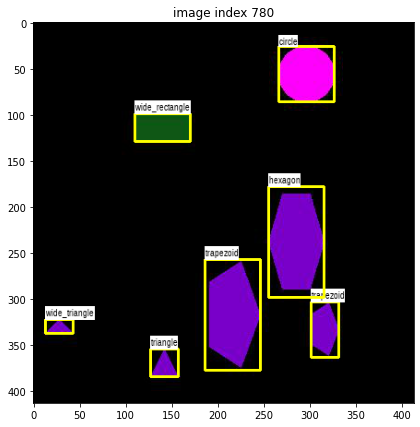

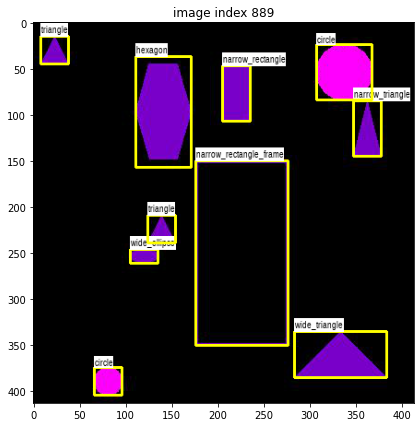

## 1. Dataset User Guide

## 2. Programming guide,


with their 

`Shapes` dataset consists of randomly selected geometric shapes: Square, Triangle, Trapezoid, Ellipse, Circle, and Hexagon. Here below are example images



is a code generated dataset for object detection networks. 




The images if this dataset consists of randomly selected geometric shapes, i.e. Square, Triangle, Trapezoid, Ellipse, Circle, and Hexagon. Parameters such as images color, width-height aspect ratio, are set in a json file.

an easy to learn and flexible to modify dataset for object detection networks.




This notebook presents the `Shapes` dataset.
The dataset 



The images if this dataset consists of randomly selected geometric shapes, i.e. Square, Triangle, Trapezoid, Ellipse, Circle, and Hexagon. Parameters such as images color, width-height aspect ratio, are set in a json file.

The dataset creator generates the dataset in 2 format:

1. A set of image files, with an annotation.json file which holds the metadata, i.e. bounding boxes coordinates.

2. Tfrecord files which hold the images and the detection metadata.



Here below are 2 dataset images examples, with bounding boxes annotations.


Sections of this notebook:

1. Details about dataset output formats and structures.

2. An orientation to the dataset creation configuration files.

3. An introduction on running the dataset generating code.

4. An example of dataset usage.





The images a


The notebook includes 3 chapters:
- Clone the `create-shape` repo 
  -The repo already holds a prepared dataset, as described in repo's `Readme.md`
- Create a new dataset: image files and an annotation `json` file.
- Plot Dataset Examples - The code is almost a duplication of repo's `plot_images.py`
- 

##Clone the repo

Repo already contains a shapes dataset created using current config files


In [36]:
!git clone https://github.com/ronen-halevy/shapes-dataset.git

Cloning into 'shapes-dataset'...
remote: Enumerating objects: 100446, done.
remote: Counting objects: 100% (58384/58384), done.
remote: Compressing objects: 100% (57837/57837), done.
remote: Total 100446 (delta 547), reused 58369 (delta 532), pack-reused 42062
Receiving objects: 100% (100446/100446), 634.25 MiB | 25.54 MiB/s, done.
Resolving deltas: 100% (1002/1002), done.
Checking out files: 100% (19/19), done.


In [37]:
%cd shapes-dataset

/content/shapes-dataset/shapes-dataset/shapes-dataset/shapes-dataset/shapes-dataset


##Create a new dataset

Configurations are set in the 2 json files

In [38]:
config_file = 'config/config.json'
shapes_file = 'config/shapes.json'

!python create_shapes_dataset.py config_file shapes_file

## Plot Dataset Examples
Plot plot images+bounding boxes from dataset
This code is similar to contents of shapes-dataset/plot_image.py

In [39]:
def draw_text_on_bounding_box(image, ymin, xmin, color, display_str_list=(), font_size=30):
    draw = ImageDraw.Draw(image)
    try:
        font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                                  font_size)
    except IOError:
        print("Font not found, using default font.")
        font = ImageFont.load_default()

    text_margin_factor = 0.05

    text_widths, text_heights = zip(*[font.getsize(display_str) for display_str in display_str_list])
    text_margins = np.ceil(text_margin_factor * np.array(text_heights))
    text_bottoms = ymin * (ymin > text_heights) + (ymin + text_heights) * (ymin <= text_heights)

    for idx, (display_str, xmint, text_bottom, text_width, text_height, text_margin) in enumerate(
            zip(display_str_list, xmin, text_bottoms, text_widths, text_heights, text_margins)):
        text_width, text_height = font.getsize(display_str)
        text_margin = np.ceil(text_margin_factor * text_height)

        draw.rectangle(((xmint, text_bottom - text_height - 2 * text_margin),
                        (xmint + text_width + text_margin, text_bottom)),
                       fill=color)

        draw.text((xmint + text_margin, text_bottom - text_height - text_margin),
                  display_str,
                  fill="black",
                  font=font)
    return image


In [40]:
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont


def draw_bounding_box(image, boxes, color, thickness=3):
    draw = ImageDraw.Draw(image)
    for box in boxes:
        xmin, ymin, xmax, ymax = box
        draw.line([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin),
                   (xmin, ymin)],
                  width=thickness,
                  fill=color)
    return image


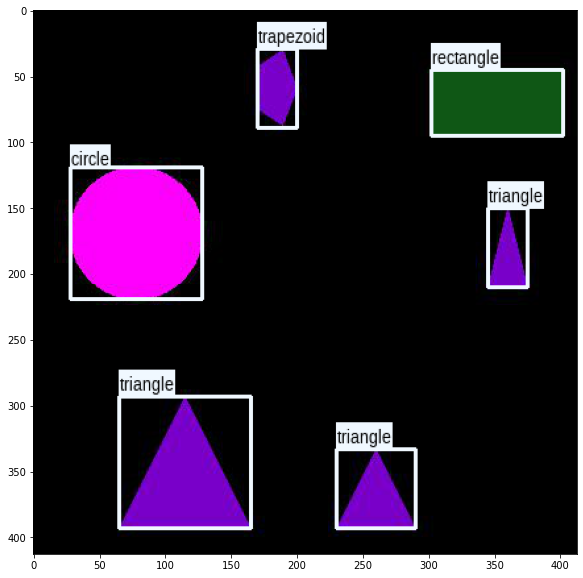

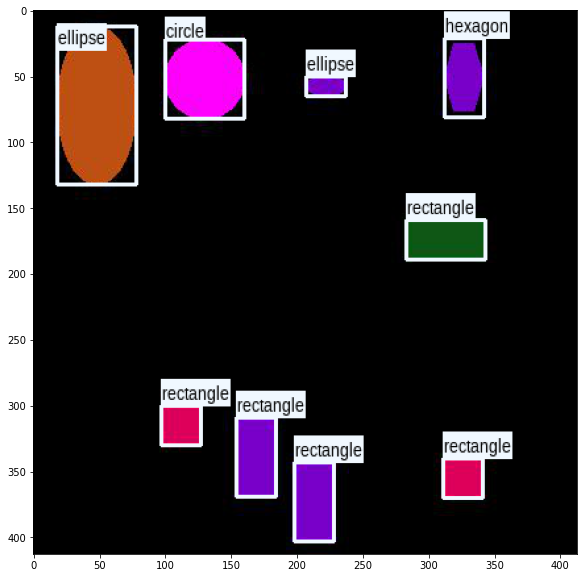

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import json

with open('config/config.json') as f:
    config = json.load(f)


annotations_path = config["annotations_path"]
images_dir = config['images_dir']

with open(annotations_path) as f:
  annotations = json.load(f)['annotations']

plot_setup_params = {
  'num_of_images': 2,
  'start_index': 0,
  'random_select': True,
  'figsize': (7, 7)
}

num_of_images = plot_setup_params['num_of_images']
start_index = plot_setup_params['start_index']
random_select = plot_setup_params['random_select']

for idx in range(num_of_images):
  image_index = np.random.randint(start_index, len(annotations)) if random_select else start_index + idx
  line = annotations[image_index]
  boxes = line['bboxes']

  image_path = f'{images_dir}{line["image_filename"]}'
  image = Image.open(image_path)

  colors = list(ImageColor.colormap.values())
  color = colors[0]

  annotated_bbox_image = draw_bounding_box(image, boxes, color, thickness=3)

  classes = [anno_object['label'] for anno_object in line['objects']]
  boxes = np.array(boxes)
  annotated_text_image = draw_text_on_bounding_box(annotated_bbox_image, boxes[..., 1], boxes[..., 0], color,
                                                 classes, font_size=15)

  figure(figsize=(10, 10))

  plt.imshow(annotated_bbox_image)
  plt.show()
